In [2]:
suppressMessages({
library(Seurat)
library(tidyverse)
library(ggpubr)
library(viridis)
library(cowplot)
dotenv::load_dot_env()
})

In [3]:
PDIR = Sys.getenv("PROJECT_DIR")

In [10]:
OUTDIR = file.path(PDIR, "2020PREDICTFIGS/TcllsDeepDive")

In [11]:
dir.create(OUTDIR)

## Read in data

In [12]:
srobj = readRDS(file.path(PDIR, "TcllsDeepDive/srobj_calcUMAP.rds"))

## MKI67 feature plot

In [14]:
srobj$MKI67 = srobj@assays$RNA@data["MKI67",]

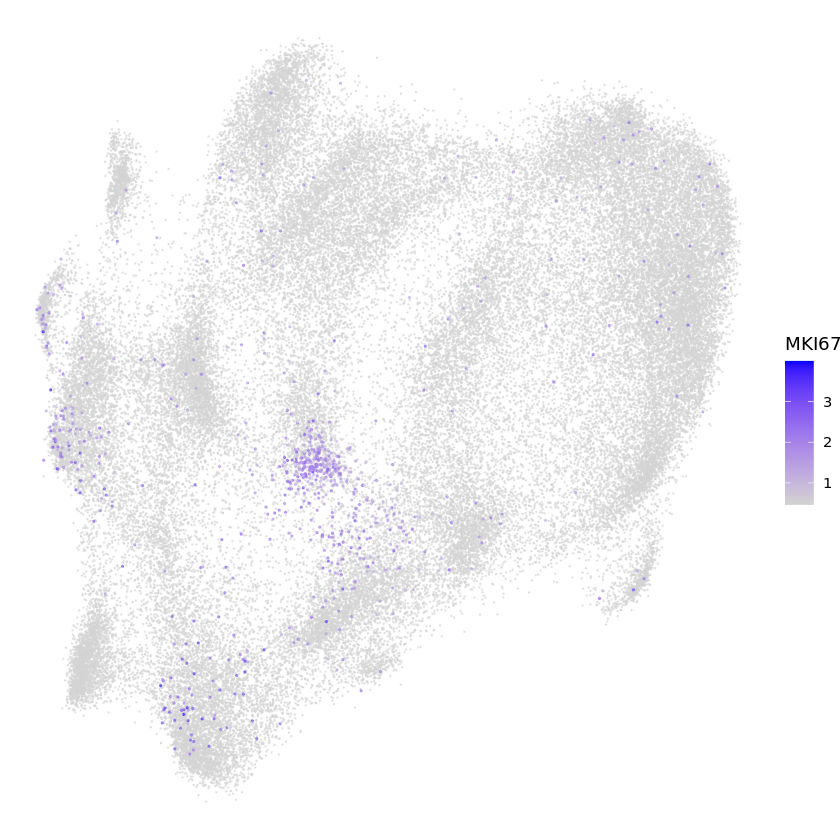

In [46]:
ggplot(srobj@meta.data) +
    geom_point(data=srobj@meta.data[srobj$MKI67 == 0,],
               aes(x=umapX, y=umapY), 
               color="lightgray",
               size=.1, alpha=.5) +
    geom_point(data=srobj@meta.data[srobj$MKI67 > 0,],
               aes(x=umapX, y=umapY, color=MKI67),
               size=.3, alpha=.5) +
    scale_color_gradient(low="lightgrey", high="blue") +
    theme_void()

# Violin Plot

In [ ]:
TNFcols = c("NM"="#757575","NOA"="#32c4db","PR"="#db324c","FR"="#fcc603")
srobj$antiTNF_response = factor(srobj$antiTNF_response, levels=c("NM", "NOA", "RESP", "PR"))
levels(srobj$antiTNF_response) = c("NM", "NOA", "FR", "PR")

In [58]:
srobj$antiTNF_response[is.na(srobj$antiTNF_response)] = "FR"

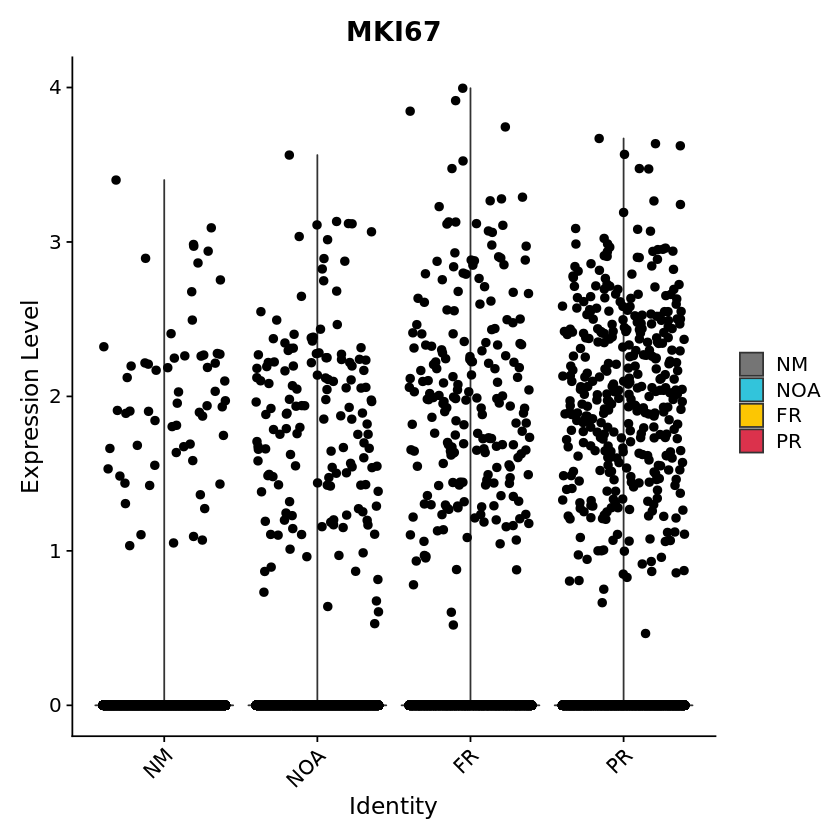

In [59]:
p = VlnPlot(srobj, "MKI67",assay = "RNA", group.by = "antiTNF_response", cols = TNFcols, pt.size = 2)
p

In [62]:
ggsave(plot=p, 
       file=file.path(OUTDIR, "F_MKI67_violin_plot.pdf"), 
       useDingbats=FALSE,
       height=6, width=6
      )

In [63]:
file = file.path(OUTDIR, "F_MKI67_violin_plot.pdf")

In [36]:
srobj[['umap.pseudo']] = CreateDimReducObject(
    embeddings = as.matrix(setNames(srobj@meta.data[, c("umapX", "umapY")], c("pt_1", "pt_2"))),
    key = "pt_", 
    assay = DefaultAssay(srobj))

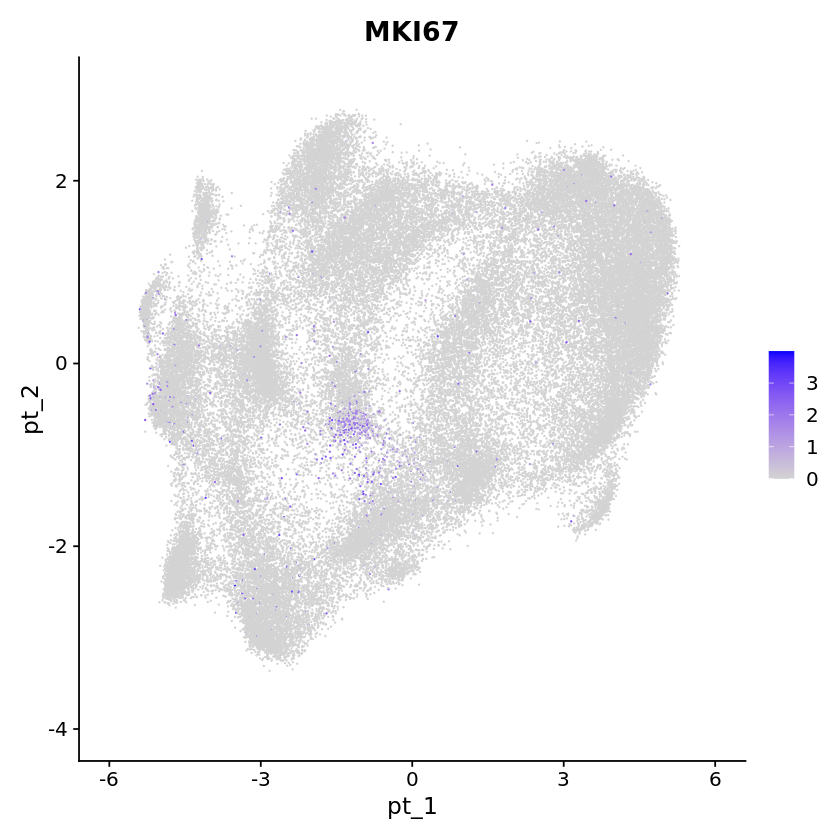

In [41]:
FeaturePlot(srobj, "MKI67", reduction="umap.pseudo")